## Performance calculation

In [97]:
from statistics import stdev
import random as rd;
import matplotlib.pyplot as plt;
# import math

def resultWinRand(winChance:float, num:int)->list:
    res = []
    for _ in range(num):
        winConfi = rd.randint(0, 99);
        if winConfi < winChance : res.append(1)
        else : res.append(0)
    return res

def resultRand( num:int)->list:
    res = []
    for _ in range(num):
        res.append(rd.randint(0, 1));
    return res

def genData(binaryList:list)->list:
    res = [];
    currData = (0,0);
    for bi in binaryList:
        if bi == 1 :
            currData = (currData[0]+1,currData[1]);
        else:
            currData = (currData[0],currData[1]+1);
        res.append(currData);
    return res;

def performsCal(playData: list, cW:float, wW:float, pastW:float, accumW:float)->list:
    result = []
    accum = 0
    pastRes = (0,0)
    lastPerform = 0
    for pair in playData:
        currentSkill = ((cW*pair[0])-(wW*pair[1]))-(pastW*lastPerform)+(accumW*accum)
        result.append(currentSkill)
        if ((pair[1]-pastRes[1])>0): accum = 0
        else: accum = (pair[0]-pastRes[0])+accum
        lastPerform = currentSkill
        pastRes = pair
    return result;

def printDataNResults(data:list, skillsMatrix:list)->None:
    print("data:"+str(data))
    for skills in skillsMatrix:
        plt.title("result no:" + str(skillsMatrix.index(skills)))
        plt.ylabel("performance")
        plt.xlabel("time")
        plt.plot(skills);
        plt.show();

def infering(criti:list, input)->str:
    if input < criti[0] : return "<-"+str(criti[0])
    for i in range(len(criti)):
        if input < criti[i]: return str(criti[i-1])+"<->"+str(criti[i])
    return str(criti[len(criti)-1])+"->"

# def stdevOf(x:list)->float:
#     return

gametype:Seq
playData:[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (6, 2), (6, 3), (7, 3), (7, 4), (8, 4), (9, 4), (10, 4), (10, 5), (11, 5), (11, 6), (11, 7), (12, 7), (12, 8)]


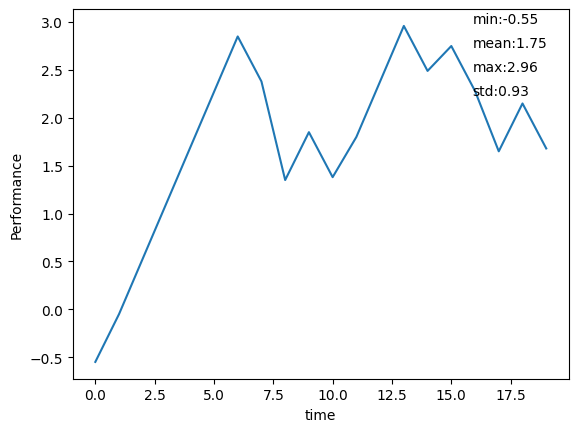

In [411]:
# Pre config [cW,wW,accumW]
# tier 0: 0.5,0.4,0.1
# tier 1: 0.5,0.5,0.09
# tier 2: 0.5,0.55,0.08


# Gametype number meaning
# 1 : Reverse Retention
# 2 : Sequece Mem
# 3 : Random Mem

gametypeNameList = ["Reverse","Seq","Rand mem"]

gametype = rd.randint(1,3);
genResult = resultRand(20);
playData = genData(genResult)
performList = performsCal(playData,cW=0.5,wW=0.55,pastW=0,accumW=0.08)
performMin = round(min(performList),2)
performMean = round(sum(performList)/len(performList),2)
performMax = round(max(performList),2)
performStd = round(stdev(performList),2)

print("gametype:"+gametypeNameList[gametype-1])
print("playData:%s"%(playData))
plt.ylabel("Performance")
plt.xlabel("time")
plt.figtext(0.75,0.85,"min:"+str(performMin))
plt.figtext(0.75,0.80,"mean:"+str(performMean))
plt.figtext(0.75,0.75,"max:"+str(performMax))
plt.figtext(0.75,0.70,"std:"+str(performStd))
plt.plot(performList);

In [412]:
moodList = ["stressed", "fine", "bored"]
moodText = moodList[2]

outputFile = open("../placeholderData/tier2.data",'a')
minText = "min " + infering([-1,0],performMin)
meanText = "mean " + infering([-0.5,1],performMean)
maxText = "max " + infering([0,1],performMax)
stdText = "std " + infering([0,1],performStd)
gametypeText = "gametype" + str(gametype)

textList = [gametypeText, minText, meanText, maxText, stdText, moodText]

toReccord = ""
for tex in textList:
    toReccord += tex + "    "

outputFile.write("\n"+toReccord)
outputFile.close()